In [3]:
!pip install yfinance

In [4]:
import yfinance as yf


symbol = 'TSLA'
start_date = '2023-01-01'
end_date = '2024-01-01'

stock_data = yf.download(symbol, start=start_date, end=end_date)
stock_data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2023-01-03,108.099998,118.800003,104.639999,118.470001,231402800
2023-01-04,113.639999,114.589996,107.519997,109.110001,180389000
2023-01-05,110.339996,111.750000,107.160004,110.510002,157986300
2023-01-06,113.059998,114.389999,101.809998,103.000000,220911100
2023-01-09,119.769997,123.519997,117.110001,118.959999,190284000


In [5]:

missing_values = stock_data.isnull().sum()
print("Missing Values:\n", missing_values)


stock_data.dropna(inplace=True)


Missing Values:
 Price   Ticker
Close   TSLA      0
High    TSLA      0
Low     TSLA      0
Open    TSLA      0
Volume  TSLA      0
dtype: int64


<Figure size 1000x600 with 0 Axes>

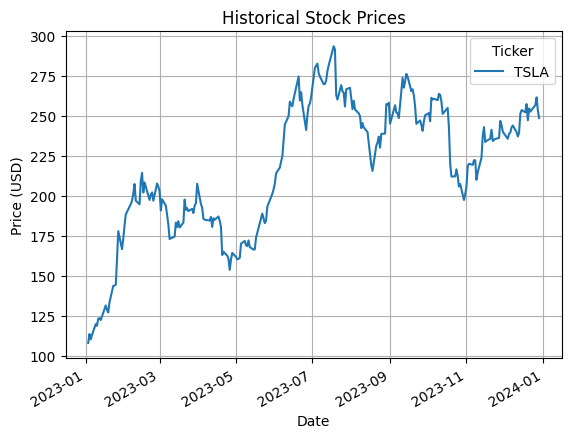

In [6]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
stock_data['Close'].plot()
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

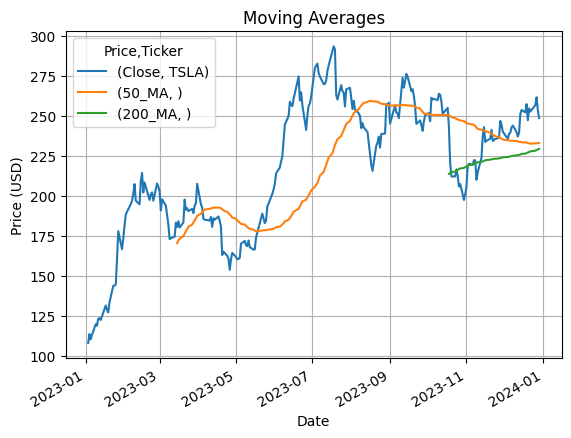

In [7]:

stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()


plt.figure(figsize=(10, 6))
stock_data[['Close', '50_MA', '200_MA']].plot()
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


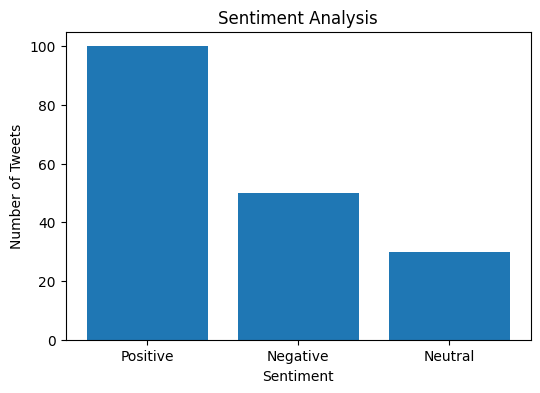

In [9]:

negative_tweets = 50
neutral_tweets = 30


plt.figure(figsize=(6, 4))
plt.bar(['Positive', 'Negative', 'Neutral'], [positive_tweets, negative_tweets, neutral_tweets])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


stock_data = stock_data.dropna()


X = stock_data[['50_MA', '200_MA']].values
y = stock_data['Close'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 38.8803144573688


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

stock_data = stock_data.dropna()


X = stock_data[['50_MA', '200_MA']].values
y = stock_data['Close'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("R-squared:", r2)

R-squared: 0.8323290513284913
